# House Prices - Advanced Regression Techniques
**Roberto Israel Lopez**

80604599 | CS Undergraduate | rilopez6@miners.utep.edu



**Ruth Trejo**

80580042 | CS Graduate | rtrejo9@miners.utep.edu


----
## Competition Description

We will accept input from a home buyer that is providing details about their dream house located in Ames, Iowa. Based on their input, their description can be used with 79 explanatory variables describing almost every aspect of residential homes.

Our model is meant to predict the final price of each home based on the home buyers descriptive details about their dream house [1].

--

[1] Googleplex. *House Prices - Advanced Regression Techniques*. Competition sponsored by Kaggle. Available on: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/

----

# `Building the Model`

Before building our model, with different training algorithm techniques, we must import libraries, as shown below. 

We will use pandas to read both the train.csv and view the head of the train data, to take a peek at our dataset, in order to make sure pandas stored the dataset in said variables.

In [ ]:
import pandas as pd
import numpy as np 
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

#`Understanding the dataset`

Lets look at the different attributes and see the values given in those attributes. 

In [ ]:
X_train = pd.read_csv('train.csv')
print("---------- TRAIN DATASET ----------")
X_train.head()

---------- TRAIN DATASET ----------


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
#Shuffles training data
X_train = X_train.sample(frac=1).reset_index(drop=True)
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1157,80,RL,85.0,9350,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,10,2008,WD,Normal,179900
1,1149,50,RM,NaN,5700,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,116900
2,265,30,RM,30.0,5232,Pave,Grvl,IR3,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,73000
3,940,70,RL,NaN,24090,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,COD,Normal,244400
4,880,20,RL,NaN,7000,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,7,2009,WD,Normal,136500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000
1456,774,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,COD,Normal,114500
1457,1411,60,RL,79.0,12420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,230000
1458,990,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,197000


To understand the 'SalePrice' data better, we can plot it using the SeaBorn library to help us visually understand our data.

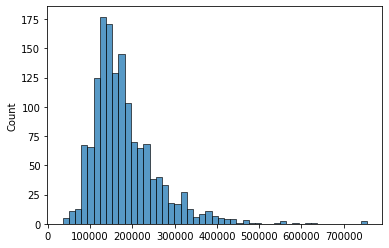

In [ ]:
Y_train = X_train['SalePrice'].values
sns.histplot( Y_train )

As shown on the histogram, most of the Sale Price is within the range of about 90,000K and 300,000. Anything below or above the range would be considered an **outlier**. However, this shows how this distribution is not normal and is skewed.

We will use Log Transformation.

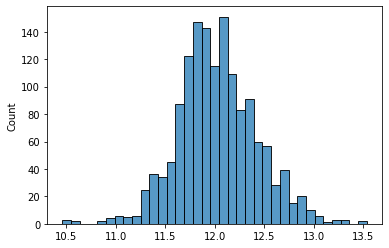

In [ ]:
Y_train_skewed = np.log( Y_train )
sns.histplot( Y_train_skewed )

The transformation is not the best but it is definitely better than what we had before. 

We can also view the range of Sale Price based on the Lot Area, for example - as shown below:

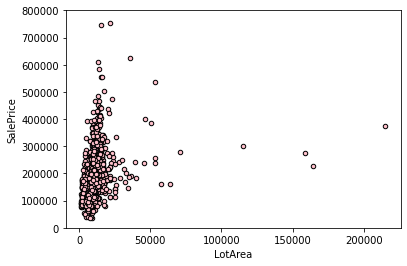

In [ ]:
sale_price = X_train['SalePrice']
lot_area = X_train['LotArea']

data = pd.concat([sale_price, lot_area], axis=1)
data.plot.scatter(x='LotArea', y='SalePrice', ylim=(0,800000), s=20, color="pink", edgecolor='black');

The graph describles how the lot areas that are scattered around a lower price also have some that are considered even greater. For example, a lot area of about ~60,000 has the same Sale Price as a lot area of about ~10,000.

#`Feature Engineering`
The first step we need to do after viewing the data, we need to normalize and standarize the data for better results. 

We will examine and modify the data feature by feature in the next couple of steps:
1. Examining which features are mostly Nans and removing them from our data
2. Analyzing which features have classes as values and encoding them using "LabelEncoder" into numbers instead of using One Hot Encoding.
3. Scaling all values in the data in values ranging form 0 - 1 

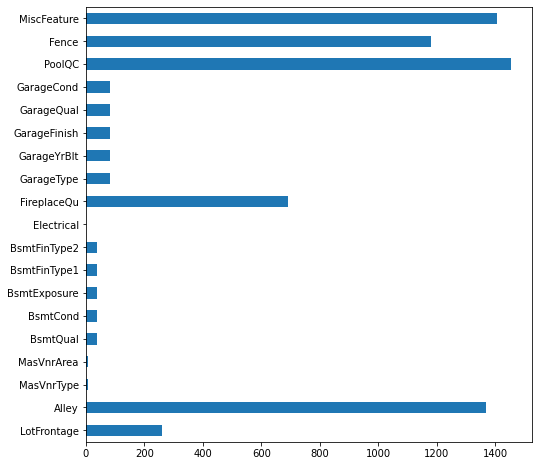

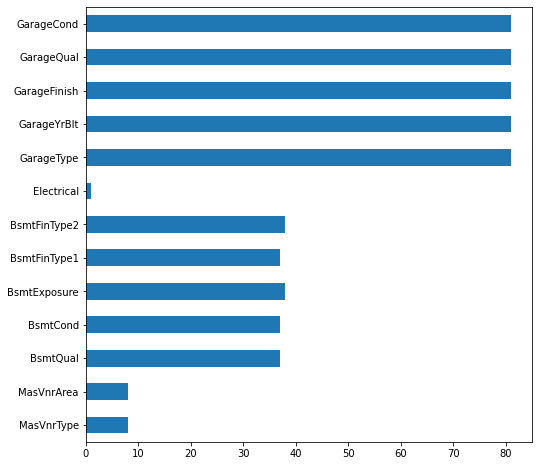

In [ ]:
#identifying columns with high number of NA's
nans = X_train.isna().sum()
plt.figure(figsize=(8,8))
nans[nans!=0].plot(kind='barh');

#removing columns with high umber of NA's
X_train.drop(['Fence', 'MiscFeature', 'PoolQC', 'Alley', 'FireplaceQu', 'LotFrontage'], axis=1,inplace=True)
nans = X_train.isna().sum()
plt.figure(figsize=(8,8))
nans[nans!=0].plot(kind='barh');

# `Nan to Median`
Certain columns, that had numerical data, had missing values and were labeled as NA. These values cannot be calculated and therefore had to be changed.

We decided to take a "nan to mean" approach. Meaning that any numerical column, containing NA, would be replaced with the mean of the entire dataset. However, when we converted na to mean, we realized that outliers in our dataset, that we saw in the graph, heavily affected the results.

To fix this issue, we decided to convert the nan to the **median** instead, in order to avoid outliers affecting our data.

We also turned objects into LabelEncoders rather than using One-Hot Encoding.

In [ ]:
#for columns with values strings and nans
LE = LabelEncoder()
objects = X_train.select_dtypes(include="object").columns
print(objects)

for obj in objects:
  X_train[obj] = LE.fit_transform(X_train[obj])

#for columns with values nans and ints
X_train = X_train.fillna(X_train.median())
X_train.head()

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1157,80,3,9350,1,3,3,0,4,0,...,0,96,0,0,0,10,2008,8,4,179900
1,1149,50,4,5700,1,3,3,0,4,0,...,176,0,0,0,0,8,2008,8,4,116900
2,265,30,4,5232,1,2,0,0,4,0,...,0,0,0,0,0,6,2008,8,4,73000
3,940,70,3,24090,1,3,3,0,4,0,...,318,0,0,0,0,6,2010,0,4,244400
4,880,20,3,7000,1,0,3,0,1,0,...,0,0,0,0,0,7,2009,8,4,136500


In [ ]:
#scaling data
df = X_train.iloc[:,:-1]
mm = MinMaxScaler()
df[:] = mm.fit_transform(df[:])

df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.792324,0.352941,0.75,0.037626,1.0,1.000000,1.0,0.0,1.00,0.0,...,0.16819,0.000000,0.188976,0.0,0.0,0.0,0.818182,0.50,1.0,0.8
1,0.786840,0.176471,1.00,0.020566,1.0,1.000000,1.0,0.0,1.00,0.0,...,0.00000,0.318841,0.000000,0.0,0.0,0.0,0.636364,0.50,1.0,0.8
2,0.180946,0.058824,1.00,0.018379,1.0,0.666667,0.0,0.0,1.00,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.454545,0.50,1.0,0.8
3,0.643592,0.294118,0.75,0.106523,1.0,1.000000,1.0,0.0,1.00,0.0,...,0.00000,0.576087,0.000000,0.0,0.0,0.0,0.454545,1.00,0.0,0.8
4,0.602467,0.000000,0.75,0.026642,1.0,0.000000,1.0,0.0,0.25,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.545455,0.75,1.0,0.8


In [ ]:
#split Data into training and testing data from X_train
X = df.values
Y = X_train['SalePrice'].values

X_test , X_train, Y_test, Y_train = train_test_split(X, Y, train_size=0.25, random_state=42)

print("X_train Shape and X_test Shape\n", X_train.shape, X_test.shape)
print("Y_train Shape and Y_test Shape\n", Y_train.shape, Y_test.shape)

X_train Shape and X_test Shape
 (1095, 74) (365, 74)
Y_train Shape and Y_test Shape
 (1095,) (365,)


#`Making predictions using different algorithm techniques`

In [ ]:
def RMSE(Y_test, pred):
  MSE = mean_squared_error(Y_test, pred)
  return math.sqrt(MSE)

# `Algorithms`

1. Linear Regression
2. Logistic Regression
3. Random Forest Regressor


## Linear Regression

It makes more sense to use a regression task to a problem such as predicting house prices since the problem is continuous. For this reason, we decided to use linear regression. 

## Logistic Regression
Even though this problem is a continous problem, we still wanted to understand how the predictions would come if we used a classification task. Since we are using Linear Regression, we decided to use Logistic Regression for its use of Linear regression and its a classification algorithm.

## Random Forest Regressor
We also used an ensemble to test if using an ensemble of trees can beat linear regression. That is why we went with using Random Forest Regressor. 

In [ ]:
def LinearRegression_model(X_train, Y_train, X_test):
  model = LinearRegression().fit(X_train, Y_train)
  pred = model.predict(X_test)
  return pred

def RandomForestRegressor_model(X_train, Y_train, X_test, n_estimators):
  model = RandomForestRegressor(n_estimators = n_estimators, random_state=0)
  model.fit(X_train, Y_train)
  pred = model.predict(X_test)
  return pred

def LogisticRegression_model(X_train, Y_train, X_test, max_iter):
  model = LogisticRegression(solver='lbfgs', max_iter=max_iter,random_state=0)
  model.fit(X_train,Y_train)
  pred = model.predict(X_test)
  return pred


In [ ]:
rf_pred = RandomForestRegressor_model(X_train, Y_train, X_test, n_estimators = 230)
rf_rmse = RMSE(Y_test, rf_pred)
rf_r2_score = r2_score(Y_test, rf_pred)
print("Random Forest\n====================")
print("RMSE: ", rf_rmse)
print("R2 Score: ", rf_r2_score)

Random Forest
RMSE:  29838.12483292914
R2 Score:  0.8312188446775097


In [ ]:
lr_pred = LinearRegression_model(X_train, Y_train, X_test)
lr_rmse = RMSE(Y_test, lr_pred)
lr_r2_score = r2_score(Y_test, lr_pred)
print("Linear Regression\n====================")
print("RMSE: ", lr_rmse)
print("R2 Score: ", lr_r2_score)

Linear Regression
RMSE:  28311.214464474702
R2 Score:  0.8480509806566813


In [ ]:
lor_pred = LogisticRegression_model(X_train, Y_train, X_test, 100)
lor_rmse = RMSE(Y_test, lor_pred)
lor_r2_score = r2_score(Y_test, lor_pred)
print("Logistic Regression\n====================")
print("RMSE: ", lor_rmse)
print("R2 Score: ", lor_r2_score)

Logistic Regression
RMSE:  51187.41853518197
R2 Score:  0.5032849052184551


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


# `Shuffled Training Data Output Results`

In [ ]:
results_file = open("results_file.txt", "a")

results_file.write("Randome Forest")
results_file.write("\n--------------")
results_file.write("\nRMSE: " + str(rf_rmse))
results_file.write("\nR2 Score: " + str(rf_r2_score))

results_file.write("\n\nLinear Regression")
results_file.write("\n--------------")
results_file.write("\nRMSE: " + str(lr_rmse))
results_file.write("\nR2 Score: " + str(lr_r2_score))

results_file.write("\n\nLogistic Regression")
results_file.write("\n------------------")
results_file.write("\nRMSE: " + str(lor_rmse))
results_file.write("\nR2 Score: " + str(lor_r2_score) + "\n\n")

results_file.write("=====================================\n\n")

results_file.close()

# `Error Analysis`
We will plot some graphs using Matplotlib to see the Y_test vs the different predictions given by our three main models built with Random Forest Regression, Linear Regression, and Logistic Regression.

### **Linear Regression Error Analysis**
The error analysis can be shown below for Random Forrest Regression. There do seem to be many outliers of Actual vs Predicted values. However, by analyzing the graph, we can see that there is around an 85% good accuracy between the predicted and actual values. There may be small changes in this graph due to shfufling the training and testing data. 

We had to shuffle the training and test data because we were getting very sprsed points, due to overfitting. By shuffling, we are able to ensure that re-training the model with different batches will better help represent the entire dataset. 

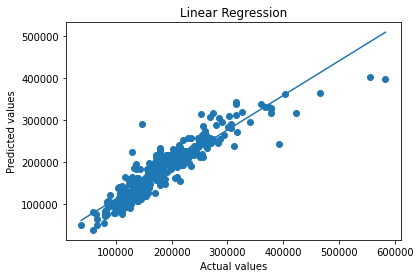

In [ ]:
import numpy as np
plt.scatter(Y_test, lr_pred)
plt.title('Linear Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, lr_pred, 1))(np.unique(Y_test)))

plt.show()

### **Logistic Regression Error Analysis**

Below, lies the representation of how well our model did. We noticed that Logistic regression did much worse on training the model, as we see a more sparsed and non-connecting values between the true and predictions.

This could be the fact that Logistic regression does not have a contiouous output, compared to Linear Regression. After running another batch of shuffled training data, the model does improve, but is still faulty and not constant. 

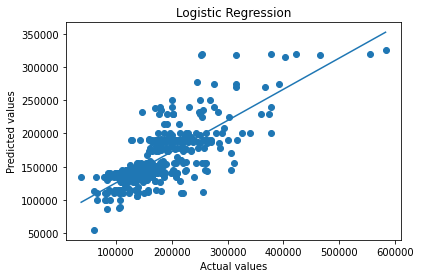

In [ ]:
import numpy as np
plt.scatter(Y_test, lor_pred)
plt.title('Logistic Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, lor_pred, 1))(np.unique(Y_test)))

plt.show()

### **Random Forrest Regressor Error Analysis**

The graph below shows how well our Random Forest Regressor model predicted the prices of homes in Ames, Iowa. The percentage of how accurate the model predicted the prices ranges from 80% - 90% depending on the number iterations done. In this model, we used a total of 230 n_estimators. 

After re-shuffling our dataset and training our model, we get different predictions but still a good percentage.

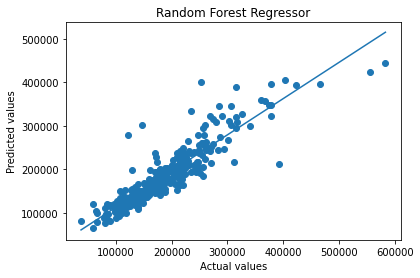

In [ ]:
#Display plot to view Error Analysis
import numpy as np
plt.scatter(Y_test, rf_pred)
plt.title('Random Forest Regressor')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.plot(np.unique(Y_test), np.poly1d(np.polyfit(Y_test, rf_pred, 1))(np.unique(Y_test)))

plt.show()

# `Conclusion`

In conclusion, the models that worked better were the ones who used algorithms that have a continuous output, which work perfectly for predicting the prices of a house. Those models were Linear Regression and Random Forest Regressor. Both algorithms are mainly used for predicting continuous outputs, which really helped in getting a good Sale Price prediction for a house price in Ames, Iowa.

From the different uses of prediction algorithms, we realized that Logistic Regression, although used mainly for binary classification or separating discrete values, since the output is only yes or no and/or 0 or 1, it doesn't work too well with the calculation of a Sale Prices.

Hence, why Linear Regression and Random Forest Regressor did a much better job at predicting the Sale Prices. These models were able to train the data well because of the normalization done to the output as well. We tried One-Hot encoding, but the accuracy of predictions was very odd and seemed to not work well as our data was not normalized correctly, which is why we decided to use Label Encoding, which assigned every unieuq value a unique integer, which worked much better than one-hot encoding. Our dataset was extremely large and had many different values in each column to choose from, which is why Labeled Encoding helped improve our models prediction.

# `KAGGLE SCORES`
As instructed, we submitted our predictions unto Kaggle and received the following score:

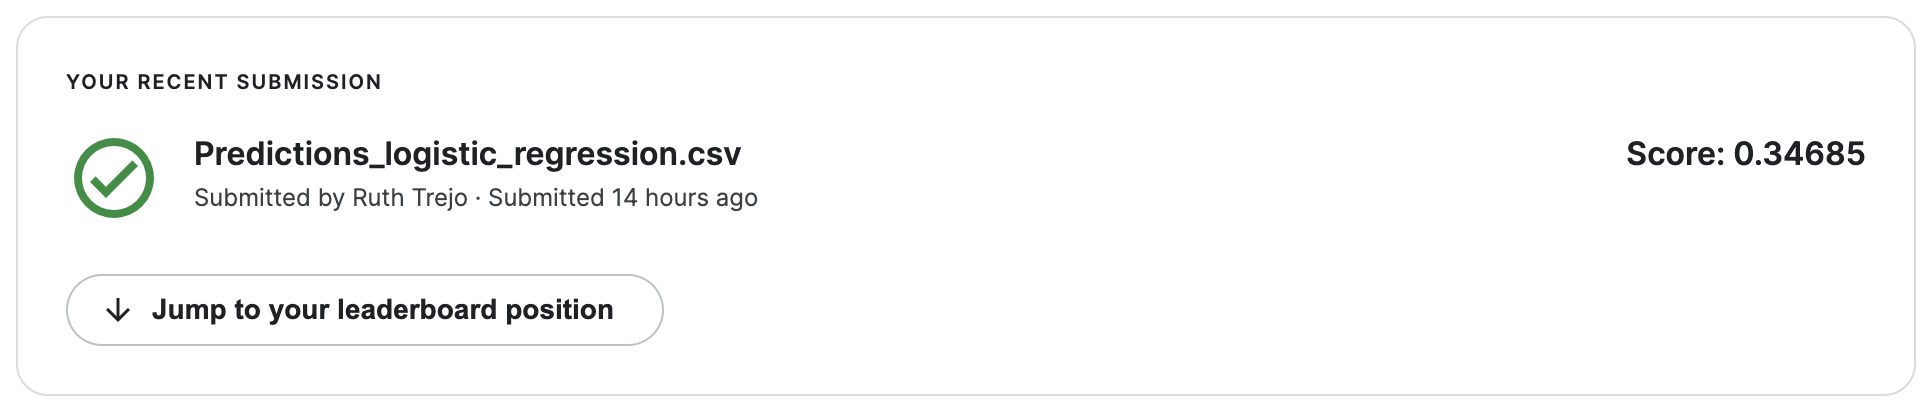

In [ ]:
from IPython.display import Image, display
display( Image('LogisticRegression-Score.png') )

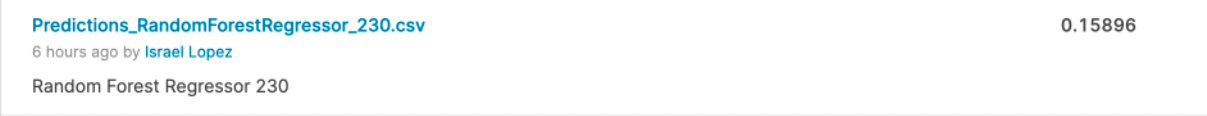

In [ ]:
display( Image('RFR-230.png') )

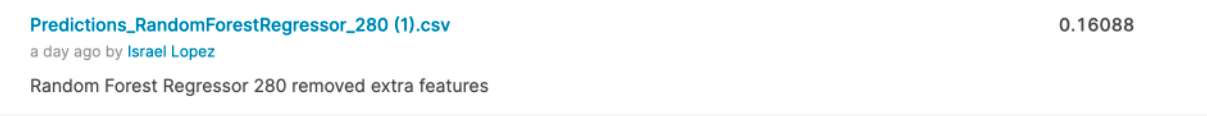

In [ ]:
display( Image('RFR280.png') )

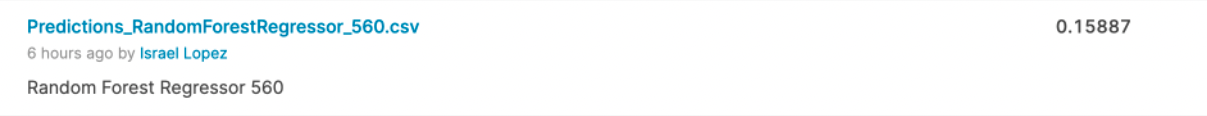

In [ ]:
display( Image('RFR560.png') )

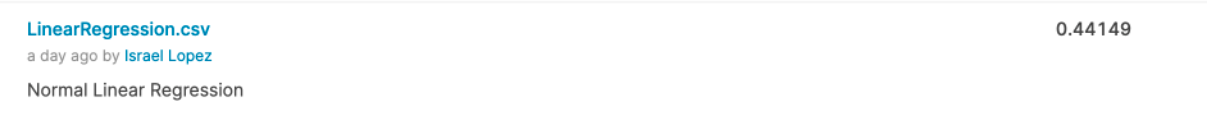

In [ ]:
display( Image('LR.png') )